## 1.a

$$-u''(x) = f(x)$$

$$x \in (0, 1) \qquad u(0) = u(1) = 0$$

discretised:

$$- \frac{v_{i+1} + v_{i-1} - 2v_i}{h^2} = f_i$$

rewrite as:

$$A \vec{v} = \bar{b}$$

where $b_i = h^2 f_i$

and $i =1,..., n$

multiplying the $-$ and moving the $h^2$ we get:

$$2v_i - v_{i+1} - v_{i-1} = h^2f_i$$

and the first iterations become:

$$2v_1 - v_2$$ 
$$2v_2 - v_3 - v_1$$ 
$$2v_3 - v_4 - v_2 $$

making a vector $\vec{v} = \begin{bmatrix} v_1 \\ v_{2} \\ \vdots \\ v_{n+1} \end{bmatrix}$ we can write the first iterations as:

$$\begin{bmatrix} 2 & 0 & 0 \end{bmatrix} \vec{v} + \begin{bmatrix} 0 & -1 & 0 \end{bmatrix}\vec{v} + \begin{bmatrix} 0 & 0 & 0 \end{bmatrix} \vec{v}= 2v_1 - v_2$$

$$\begin{bmatrix} 0 & 2 & 0 \end{bmatrix} \vec{v} + \begin{bmatrix} 0 & 0 & -1 \end{bmatrix}\vec{v} + \begin{bmatrix} -1 & 0 & 0 \end{bmatrix} \vec{v}= 2v_2 - v_3 - v_1$$

$$\begin{bmatrix} 0 & 0 & 2 \end{bmatrix} \vec{v} + \begin{bmatrix} 0 & 0 & 0 & -1 \end{bmatrix}\vec{v} + \begin{bmatrix} 0 & -1 & 0 \end{bmatrix} \vec{v}= 2v_3 - v_4 - v_2$$

We can collect these in a matrix, which gives us:

$$\begin{bmatrix} 
2 & -1 & 0 & 0 &\dots & 0 \\
-1 & 2 & -1 & 0 & \dots & 0 \\
0 & -1 & 2 & -1 & \dots & 0 \\
\vdots & \vdots &\vdots & \vdots &\ddots & 0 \\
0 & \dots & \dots & -2 & 2 & -1 \\
0 & 0 & 0 & 0 & -1 & 2 \\
\end{bmatrix} \begin{bmatrix} v_1 \\ v_{2} \\ \vdots \\ v_{n+1} \end{bmatrix} = \begin{bmatrix} h^2 b_1 \\ h^2 b_2 \\ \vdots \\ h^2 b_{n+1} \end{bmatrix}$$

No. of flops:

For $i = 1$: 

1x subtraction + 1x multiplication + 1x division = 3flops

For $i = 2, 3, .... n$, each iteration has:

1x division + 2x subtractions + 2x multiplication = 5 flops

(the division of $\tilde{b}_n/b_n$ is only necessary to to once)

for a total of $5(n-1) + 1$ flops

for the $i = n-1,... 1,$-loop we have 1x subtraction + 1x multiplication + 1x division = 3*(n-2) flops

TOTAL:

$$4 + 5(n-1) + 3(n-2)$$


## 1.b

We want to solve equations on the form 

$$a_i v_{i-1} + b_i v_i + c_i v_{i+1} = \tilde{b}_i $$

For $i= 1$ we get:

$$v_1 = \frac{\tilde{b}_1 - c_1 v_2}{b_1}$$

From Gaussian Elimination we get the following algorithm:

For $i = 2, 3 ..., n$ we do:

$$d = \frac{a_i}{b_{i-1}}$$

$$b_i = b_i - d \times c_{i-1}$$

$$\tilde{b}_i = \tilde{b}_i - d \times \tilde{b}_{i-1}$$

$$v_n = \frac{\tilde{b}_n}{b_n}$$

for $i = n-1,... 1$ do:

$$v_i = \tilde{b}_i - \frac{c_i v_{i+1}}{b_i}$$

Number of flops

In [1]:
using Plots
using LinearAlgebra

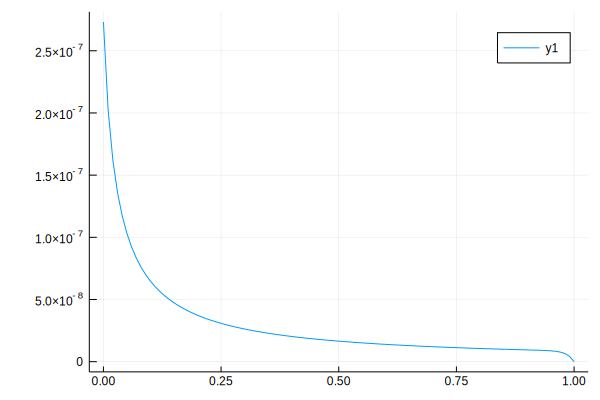

In [33]:

function matvecmulti(n)
    
    h = 1/(n + 1)          # step size
    a = zeros(Float64, n+1)  
    b = zeros(Float64, n+1)
    c = zeros(Float64, n+1)
    
    v = zeros(Float64, n+1)
    b_tild = zeros(Float64, n+1) # right side of equation

    # initialize
    for i = 1:n+1
        a[i] = -1
        b[i] = 2
        c[i] = -1
        b_tild[i] = 100*exp(-10*i)
    end
    
    b_tild .*= h^2
    
    a[1] = 0
    c[n] = 0
    
    c[1] = c[1]/b[1]
    b_tild[1] = b_tild[1]/b[1]
    
    for i = 2:n
        d = 1.0/(b[i] - c[i-1]*a[i])
        
        c[i] *= d
        b_tild[i] = (b_tild[i] - a[i]*b_tild[i-1])*d
    end
    
    v[n] = b_tild[n]
    
    for i = n-1:-1:1
        v[i] = b_tild[i] - (c[i]*v[i+1])/b[i]
        
    end
    
    return v
    
end

matvecmulti(100)

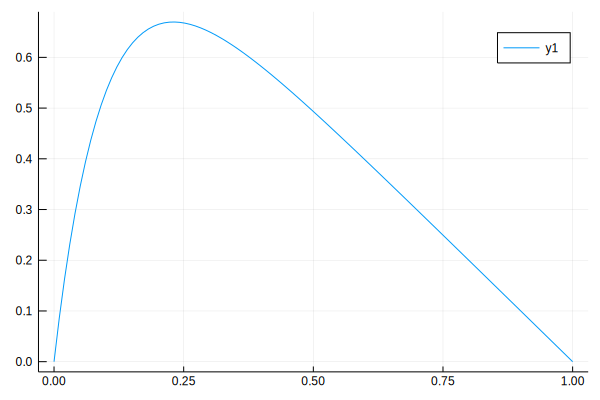

In [26]:
function f(x)
    return 100*exp(-10*x)
end

function u(x)
    return 1 - (1 - exp(-10))*x - exp(-10*x)
end

x = range(0, stop=1, length=100)

y1 = map(f, x)
y2 = map(u, x)

using Plots

#plot(x, y1)
plot(x, y2)